<a href="https://colab.research.google.com/github/MercyNgila/stutern-/blob/main/Stutern_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connect colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Import relevant libraries
import sqlite3 as sq3
import pandas as pd
import pandas.io.sql as pds
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading dataset
sq_data = sq3.Connection('/content/drive/MyDrive/attr_data.db')

In [4]:
# Expand dataframe view
pd.set_option('display.max_columns', None)

In [5]:
# Print tables in data
tables = pd.read_sql('SELECT * FROM sqlite_master', sq_data)
tables

,type,name,tbl_name,rootpage,sql
0,table,attrition_records,attrition_records,2,CREATE TABLE attrition_records (\n ...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [6]:
# Check overview of tables
query1 = '''
SELECT 
    *
FROM
    sqlite_sequence;
    '''

sequence = pd.read_sql(query1, sq_data)

sequence


,name,seq
0,attrition_records,1470


In [7]:
# Check overview of tables
query2 = '''
SELECT 
    *
FROM
    attrition_records;
    '''

attr = pd.read_sql(query2, sq_data)

attr

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### Task 1

What do you think are the 3 factors behind employee attrition?

In [36]:
# Get top three Factors behing Employee Attrition
query3 = '''
SELECT 
    Attrition,
    Department,
    COUNT(*) as count,
    ROUND(COUNT(*) / (SELECT COUNT(*) FROM attrition_records) * 100, 2) as attrition_rate
FROM attrition_records
GROUP BY Attrition,Department
ORDER BY count DESC
LIMIT 3;
'''
emp_attr = pd.read_sql(query3, sq_data)
print(emp_attr)

  Attrition              Department  count  attrition_rate
0        No  Research & Development    828             0.0
1        No                   Sales    354             0.0
2       Yes  Research & Development    133             0.0


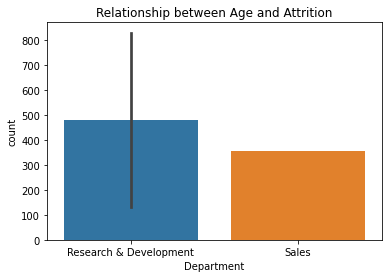

In [38]:
# Plot the results
sns.barplot(x = 'Department', y = 'count', data = emp_attr).set(title = 'Relationship between Age and Attrition')
plt.show()

### Task 2
What is the relationship between Education and Monthly Income?

In [8]:
# Select Education and Monthly Income
query1 = '''
SELECT 
    *
FROM
    attrition_records;
    '''

attr = pd.read_sql(query1, sq_data)

attr

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### Task 3
What is the effect of age on attrition?

In [12]:
# Select Age and Attirition
query1 = '''
SELECT 
    Age, Attrition
FROM
    attrition_records;
    '''

age_attr = pd.read_sql(query1, sq_data)
age_attr

,Age,Attrition
0,41,Yes
1,49,No
2,37,Yes
3,33,No
4,27,No
...,...,...
1465,36,No
1466,39,No
1467,27,No
1468,49,No


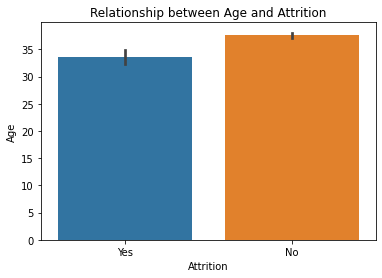

In [18]:
# Plot relationship between Age and Attrition
sns.barplot(x = 'Attrition', y = 'Age', data = age_attr).set(title = 'Relationship between Age and Attrition')
plt.show()

### Task 4
Is Income the main factor towards employee attrition?

In [32]:
connection = sq3.connect('/content/drive/MyDrive/attr_data.db')
cursor = connection.execute('select * from attrition_records')
names = list(map(lambda x: x[0], cursor.description))
connection.close()
print(names)

['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Task 5
How does work-life balance impact the overall attrition rate?